# Purpose Code DL NN

## Importing relavent packages

In [21]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec as w2v
from sklearn.feature_extraction import text
import string
import sys

%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

## Reading in data

In [22]:
df_train = pd.read_csv("C:/Users/schar/Documents/PoliSciResearch/vars/comboTraining.csv")
print("Labeled Data for Training")
print(df_train.head())
print()

df_classify = pd.read_csv("C:/Users/schar/Documents/PoliSciResearch/rawdata/purpose10_18.csv")
print("Classification Data")
print(df_classify.head())


Labeled Data for Training
   Unnamed: 0            Purpose Code Categorization
0           0               MEDIA BUY          media
1           1                   MEDIA          media
2           2         MEDIA PLACEMENT          media
3           3    TV / MEDIA PLACEMENT          media
4           4  TELEVISION ADVERTISING          media

Classification Data
                    purposefix  exp_amo  transaction_amt  purp_id  source  \
0  \tCOMMUNICATIONS CONSULTING      NaN      4000.000000    15834  oppexp   
1               \tPAC BANK FEE      NaN        40.000000    15835  oppexp   
2            0 LODGING EXPENSE      NaN       320.510010    15836  oppexp   
3                           00      NaN      1462.119995    15837  oppexp   
4                     00000000      NaN         4.950000    15838  oppexp   

        total  
0  4000.00000  
1    40.00000  
2   320.51001  
3  1462.12000  
4     4.95000  


## Cleaning PC for training

In [23]:
print("cleaning purposecodes")
purposeCodes = df_train["Purpose Code"].values
labels = df_train["Categorization"].values
# lowercase
purposeCodes = np.array([x.lower() for x in purposeCodes])
# remove punctuation
purposeCodes = np.array([x.translate(str.maketrans('', '', string.punctuation)) for x in purposeCodes])
# remove digits
purposeCodes = np.array([x.translate(str.maketrans('', '', string.digits)) for x in purposeCodes])
count = 0
print("purposecodes cleaned")

cleaning purposecodes
purposecodes cleaned


## Getting the array of words for Spider (optional next step)

In [24]:
import json
spiderwords = []
with open("../vars/categories.json", "r") as catwords:
    data = json.load(catwords)
    for key in data.keys():
        spiderwords.extend(data[key])

In [25]:
print(spiderwords)
print("Length: ", len(spiderwords))

['art', 'media', 'newspaper', 'advertising', 'ad', 'advert', 'tv', 'news', 'communications', 'radio', 'television', 'tv ad', 'media buy', 'buy', 'production', 'media placement', 'television advertising', 'and media', 'placement', 'ad production', 'television production', 'tv advertising', 'media production', 'tv ads', 'ad buy', 'radio ad', 'ad placement', 'production costs', 'tv advertisement', 'production', 'buy', 'ad air', 'air buy', 'email', 'software', 'digital', 'digital advertising', 'online advertising', 'social media', 'internet communications', 'web advertising', 'adwords', 'google ad words', 'advertising - internet', 'advertising - online', 'web ad', 'digital ad', 'social media', 'facebook', 'twitter', 'internet', 'web', 'online', 'data software', 'software', 'email', 'social', 'google', 'and digital', 'digital media', 'digital ad', 'media buy', 'internet advertising', 'and online', 'web ad', 'advertising', 'and production', 'media placement', 'ad buy', 'advertising buy', 'me

# Cleaning PC for classification

In [26]:
print("cleaning purposecodes for classification")
purposeCodes_classify = df_classify["purposefix"].values
purposeCodes_classify = purposeCodes_classify.astype('str')
# lowercase
purposeCodes_classify = np.array([x.lower() for x in purposeCodes_classify])
# remove punctuation
purposeCodes_classify = np.array([x.translate(str.maketrans('', '', string.punctuation)) for x in purposeCodes_classify])
# remove digits
purposeCodes_classify = np.array([x.translate(str.maketrans('', '', string.digits)) for x in purposeCodes_classify])
count = 0
print("purposecodes cleaned")

cleaning purposecodes for classification
purposecodes cleaned


# Converting features / labels to vectors

In [27]:
#featurevectorizer = text.CountVectorizer(binary=True).fit(purposeCodes) # for using purposeCodes as the feature set
featurevectorizer = text.CountVectorizer(binary=True).fit(spiderwords) # for using categories.json for feature set
X = featurevectorizer.transform(purposeCodes)
labelvectorizer = text.CountVectorizer(binary=True).fit(labels)
y = labelvectorizer.transform(labels)
X = X.todense()
y = y.todense()
print("Features shape: ")
print(X.shape)
print("Labels shape: ")
print(y.shape)

Features shape: 
(5498, 111)
Labels shape: 
(5498, 10)


In [28]:
X_classify = featurevectorizer.transform(purposeCodes_classify)
print("Features of PC classify shape: ")
X_classify = X_classify.todense()
print(X_classify.shape)

Features of PC classify shape: 
(451082, 111)


In [29]:
print(featurevectorizer.get_feature_names())

['accounting', 'ad', 'admin', 'administrative', 'ads', 'advert', 'advertisement', 'advertising', 'adwords', 'air', 'airline', 'analytics', 'and', 'art', 'asset', 'bank', 'banking', 'banks', 'beverage', 'buy', 'calls', 'campaign', 'canvass', 'canvassing', 'cater', 'communications', 'compliance', 'consult', 'consultant', 'consultants', 'consulting', 'contact', 'costs', 'data', 'digital', 'direct', 'dissemination', 'door', 'email', 'estimate', 'expenses', 'facebook', 'fees', 'field', 'finance', 'food', 'for', 'from', 'fundraiser', 'fundraising', 'gas', 'google', 'gotv', 'hangers', 'in', 'internet', 'kind', 'law', 'lawyers', 'legal', 'list', 'mail', 'mailer', 'management', 'manager', 'media', 'news', 'newspaper', 'online', 'opinion', 'opposing', 'other', 'outbound', 'paper', 'phone', 'phones', 'piece', 'placement', 'polling', 'postage', 'postcards', 'printing', 'production', 'purchase', 'radio', 'refreshments', 'related', 'rental', 'research', 'retainer', 'salary', 'services', 'social', 's

# Defining Helper Class to generate Batch Sizes

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train shape " + str(X_train.shape))
print("y_train shape " + str(y_train.shape))
print("X_test shape " + str(X_test.shape))
print("y_test shape " + str(y_test.shape))

X_train shape (3848, 111)
y_train shape (3848, 10)
X_test shape (1650, 111)
y_test shape (1650, 10)


In [32]:
class BatchHelper():
    
    def __init__(self):
        self.i = 0

        self.training_phrases = None
        self.training_labels = None
        
        self.testing_phrases = None
        self.training_labels = None
    
    def set_up_images(self):
        print ("Setting Up Training Images and Labels")
        self.training_phrases = X_train
        self.training_labels = y_train
        
        self.testing_phrases = X_test
        self.testing_labels = y_test
        
    def next_batch(self, batch_size):
        x = self.training_phrases[self.i: self.i + batch_size]
        y = self.training_labels[self.i: self.i + batch_size]
        self.i = (self.i + batch_size) % self.training_phrases.shape[0]
        return x, y
        

In [33]:
bh = BatchHelper()
bh.set_up_images()

Setting Up Training Images and Labels


In [34]:
batch_features, batch_labels = bh.next_batch(100)
print(batch_features.shape)
print(type(batch_features))
print(batch_labels.shape)
print(type(batch_labels))
print(bh.i)


(100, 111)
<class 'numpy.matrix'>
(100, 10)
<class 'numpy.matrix'>
100


# Creating the model

### Input data and labels

In [35]:
x = tf.placeholder(tf.float32, shape = [None, X.shape[1]]) #3856
y_true = tf.placeholder(tf.float32, shape = [None, 10])

### Hold Probability (For Dropout Layer)

In [36]:
hold_prob = tf.placeholder(tf.float32)

# Helper Functions

### Functions that create and perform operations of CNN

In [37]:
# initializing an array of weights
def init_weights(shape):
    W = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(W)

In [38]:
# initializing an array of biases
def init_bias(shape):
    b = tf.constant(0.1, shape = shape)
    return tf.Variable(b)

In [39]:
# creating a regular DNN layer
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

### Creating the Layers

In [40]:
full_layer_1 = normal_full_layer(x, 256)
full_layer_2 = normal_full_layer(full_layer_1, 256)
full_layer_3 = normal_full_layer(full_layer_2, 128)
#full_layer_4 = normal_full_layer(full_layer_3, 512)

### Creating the dropout layer

In [41]:
full_one_dropout = tf.nn.dropout(full_layer_3, keep_prob = hold_prob)

W0701 15:19:29.939625 16980 deprecation.py:506] From <ipython-input-41-2a82b07098d2>:1: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### The final full layer to get predictions

In [42]:
y_pred = normal_full_layer(full_layer_2, y.shape[1])
#y_pred = normal_full_layer(full_one_dropout, 10)

# Defining Loss Functions

In [43]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

W0701 15:19:30.004307 16980 deprecation.py:323] From <ipython-input-43-de34d8b053ce>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Making the Optimizer

In [44]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.00005)
train = optimizer.minimize(cross_entropy)

### Creating Global Variables Initializer

In [45]:
init = tf.global_variables_initializer()

# Training the Model

In [46]:
steps = 1800
accuracy = []

with tf.Session() as sess:
    
    sess.run(init)
    
    bh = BatchHelper()
    bh.set_up_images()
    
    for i in range (steps):
        batch_x, batch_y = bh.next_batch(50)
        sess.run (train, feed_dict = {x: batch_x, y_true: batch_y, hold_prob: 1})
        
        if ((i%20 == 0)):
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            #temp = sess.run(acc, feed_dict = {x:batch_x, y_true: batch_y, hold_prob:1.0})
            temp = sess.run(acc,feed_dict={x: X_test, y_true: y_test ,hold_prob:1.0})
            accuracy.append(temp)
            print(temp)
            print('\n')
            
    print("Classifying entire data")
    classifications = tf.argmax(y_pred, 1)
    PC_classifications = sess.run(classifications, feed_dict = {x: X_classify, y_true: y_test, hold_prob: 1.0})
    print("Classification done")
            

Setting Up Training Images and Labels
Currently on step 0
Accuracy is:
0.33575758


Currently on step 20
Accuracy is:
0.41454545


Currently on step 40
Accuracy is:
0.41878787


Currently on step 60
Accuracy is:
0.42242426


Currently on step 80
Accuracy is:
0.4339394


Currently on step 100
Accuracy is:
0.44


Currently on step 120
Accuracy is:
0.46848485


Currently on step 140
Accuracy is:
0.51272726


Currently on step 160
Accuracy is:
0.54


Currently on step 180
Accuracy is:
0.5660606


Currently on step 200
Accuracy is:
0.6


Currently on step 220
Accuracy is:
0.60545456


Currently on step 240
Accuracy is:
0.6139394


Currently on step 260
Accuracy is:
0.62545455


Currently on step 280
Accuracy is:
0.64787877


Currently on step 300
Accuracy is:
0.6569697


Currently on step 320
Accuracy is:
0.6587879


Currently on step 340
Accuracy is:
0.66727275


Currently on step 360
Accuracy is:
0.6830303


Currently on step 380
Accuracy is:
0.6872727


Currently on step 400
Accuracy is:

# Training Analysis

Final accuracy:  0.7587879


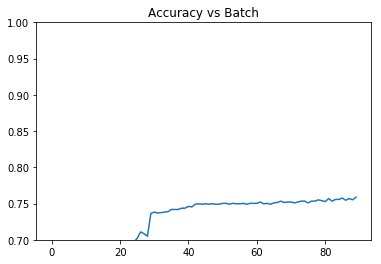

In [47]:
plt.plot(accuracy)
plt.title("Accuracy vs Batch")
plt.ylim(0.7, 1)
print("Final accuracy: ", accuracy[-1])

# PC Classification Analysis

In [48]:
print("Output shape")
print(PC_classifications.shape)

Output shape
(451082,)


### Converting int outputs to string

In [49]:
PC_stringClassifications = []
categories = labelvectorizer.get_feature_names()
for x in PC_classifications:
    PC_stringClassifications.append(categories[x])

### Adding string labelings to dataframe then exporting to csv

In [50]:
df_classify["neural network (fully trained)"] = PC_stringClassifications
df_classify.to_csv("purpose10_18_nn3.csv")